<a href="https://colab.research.google.com/github/sakouhihadil/Technocolabproject/blob/main/Predict_Blood_Donation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Blood Donations


   **1.  Inspecting transfusion.data file**




In [1]:
#print the 5 lines from transfusio.data file
!head -n5 /transfusion.data

head: cannot open '/transfusion.data' for reading: No such file or directory



**2.   Loading the blood donations data**



In [3]:
import pandas as pd

#Read dataset 
df = pd.read_csv('/content/sample_data/transfusion.data')
#Print the first rows of our dataset
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



**3. Inspecting transfusion DataFrame**



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


**4. Creating target column**



In [7]:
#rename target column

df.rename(
    columns={'whether he/she donated blood in March 2007':'target'},inplace=True
)
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0



**5. Checking target incidence**


In [8]:
# print target incidence proportions
# count the number of people who donated and not donated
df['target'].value_counts()


0    570
1    178
Name: target, dtype: int64


> this dataset is imbalanced



In [9]:
df.target.value_counts(normalize=True).round(3)

0    0.762
1    0.238
Name: target, dtype: float64

 **6. Splitting transfusion into train and test datasets**

The scikit learn train test split function enables us to split a dataset into training data and test data.


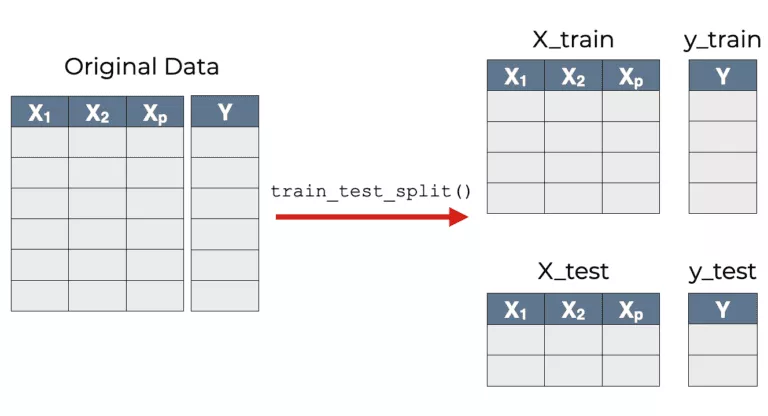








In [10]:
#import train_test_split method
from sklearn.model_selection import train_test_split

# we divided the dataset into two : x_train , x_test , y_train, y_test
X_train , X_test , y_train, y_test = train_test_split(
    
    df.drop(columns='target'),
    df.target,
    test_size=0.25,
    random_state=42,
    stratify=df.target
)

X_train.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
334,16,2,500,16
99,5,7,1750,26
116,2,7,1750,46
661,16,2,500,16
154,2,1,250,2


**7. Selecting the model using TPOT**

In [11]:
# Install tpot on the server
!pip install tpot



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 4.0 MB/s 
     |████████████████████████████████| 192.9 MB 71 kB/s 
     |████████████████████████████████| 160 kB 65.5 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=a91f184339ef28d8ff9182b1fd2ea1abc4859628aebb8ffc2f5246c6e3c39027
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [16]:
#import the tpotclassifier 
from tpot import TPOTClassifier

tpot=TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train,y_train)





Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7422459184429089

Generation 2 - Current best internal CV score: 0.7422459184429089

Generation 3 - Current best internal CV score: 0.7422459184429089

Generation 4 - Current best internal CV score: 0.7422459184429089

Generation 5 - Current best internal CV score: 0.7456308339276876

Best pipeline: MultinomialNB(Normalizer(input_matrix, norm=l2), alpha=0.001, fit_prior=True)


TPOTClassifier(config_dict='TPOT light', disable_update_check=True,
               generations=5, population_size=20, random_state=42,
               scoring='roc_auc', verbosity=2)

In [17]:
tpot.fitted_pipeline_ #best pipeline


Pipeline(steps=[('normalizer', Normalizer()),
                ('multinomialnb', MultinomialNB(alpha=0.001))])

8.  **Cheking the variance**



In [13]:
X_train.var().round()

Recency (months)              67.0
Frequency (times)             34.0
Monetary (c.c. blood)    2114364.0
Time (months)                611.0
dtype: float64

9. **Log normalization**

In [18]:
import numpy as np

#copy X_train , X_test and replace them with normed values

X_train_normed,X_test_normed = X_train.copy(),X_test.copy()

#which column to normalize 
col_normalize = 'Monetary (c.c. blood)'

for df_ in[X_train_normed,X_test_normed]:
  df_['monetary_llog']=np.log(df_[col_normalize])
  df_.drop(columns=col_normalize,inplace=True)

X_train_normed.var().round(3)

Recency (months)      66.929
Frequency (times)     33.830
Time (months)        611.147
monetary_llog          0.837
dtype: float64

10. **Training the linear regression model**

In [25]:
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

logreg = linear_model.LogisticRegression(solver='liblinear',random_state=42)

#Train the model
logreg.fit(X_train_normed,y_train)

# AUC score for tpot model
logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test_normed)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')



AUC score: 0.7890
